<a href="https://colab.research.google.com/github/Santgallo/Proyecto-Data-Science/blob/main/ProyectoDS_Partel_%2BGallo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducción**, **preguntas e hipótesis**

---



La base de datos seleccionada informa sobre las suscripciones a plazo de clientes en un banco procedente de Portugal. La información proviene de llamadas telefónicas con el objetivo de realizar una campaña de marketing.
El objetivo de estas campañas era promocionar productos financieros e incentivar a los clientes a suscribir depósitos a plazo, por lo que el dataset recoge tanto características personales (edad, trabajo, estado civil, etc.) como datos específicos sobre la interacción comercial (duración de la llamada, resultado de la campaña anterior, vía de comunicación, etc.). Esta información permite analizar comportamientos y patrones clave en la toma de decisiones de los clientes.

Tomando como base la información previamente presentada, a continuación se detallará el objetivo principal de este proyecto y el enfoque que se seguirá para alcanzarlo, por medio de las preguntas de investigación planteadas y las hipótesis formuladas.

Por lo cual, se buscará responder a las siguientes preguntas de investigación: "*¿El tipo de contacto (celular/teléfono fijo) influye en el éxito?*", "*¿El mes de contacto tiene algún tipo de impacto en la respuesta del cliente?*", "*¿La edad influye en la probabilidad de contratar un depósito a plazo o no tiene relación?*" y "*¿Ciertos tipos de trabajo tienen mayor tendencia a suscribir depósitos?*"

Además, se intentará buscar la confirmación a las siguientes hipótesis: "*Casados tienden a aceptar depósitos más que solteros*", "*Aquellos clientes que tuvieron éxito en campañas anteriores tienen mayor probabilidad de aceptar en una nueva campaña*" y "*Las personas mayores tienen más probabilidades de suscribir un depósito a plazo que los jóvenes*".



# **Diccionario**

---


1. "age" → Edad
2. "job" → Tipo de trabajo (categorías: 'admin.','Obrero','Emprendedor','Empleado doméstico','Gerente','Retirado','Trabajador por cuenta propia','Servicios','Estudiante','Técnico','Sin empleo','Desconocido')
3. "marital" → Estado civil (categorías: 'Divorciado','Casado','Soltero','Desconocido'; Nota: "Divorciado" hace referencia a divorciado y viudo)
4. "education" → Nivel de educación (categorías: 'básico.4y','básico.6y','básico.9y','educación secundaria','analfabeto','curso profesional','título universitario','desconocido')
5. "default" → Refleja si tiene crédito en mora
6. "balance" → Saldo promedio anual
7. "housing" → Refleja si tiene préstamo de vivienda
8. "loan" → Refleja si tiene un préstamo personal
9. "contact" → Tipo de comunicación de contacto (categorías: 'Celular','teléfono')
10. "day" → Último día de contacto
11. "month" → Último mes de contacto del año (categorías: 'Enero','Febrero','Marzo', ...,'Noviembre','Diciembre')
12. "duration" → Duración del último contacto, en segundos
13. "campaign" → Número de contactos realizados y para cada cliente
14. "pdays" → Número de días transcurridos desde la última vez que se contactó al cliente de una campaña anterior (-1 significa que el cliente no fue contactado previamente)
15. "previous" → Número de contactos realizados antes de esta campaña y para este cliente
16. "poutcome" → Resultado de la campaña de marketing anterior (categorías: 'fracaso','inexistente','éxito')
17. "Target" → Refleja si el cliente ha suscrito un depósito a plazo

# **Importación de librerías y de la base de datos**

También usé "style="whitegrid"" para que todas las gráficas luzcan iguales

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_theme(style="whitegrid")
warnings.filterwarnings('ignore')

In [3]:
url = "https://raw.githubusercontent.com/Santgallo/Proyecto-Data-Science-1.1/refs/heads/main/bank-full.csv"
df = pd.read_csv(url)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# **Descripción de los datos**


In [165]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,rango_edad
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2,8
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no,26-35
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922,15571
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN,NaN


# **Valores nulos por columna**

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


# **Depósito a plazo por mes**
En primera instancia, para tener una referencia, se muestra en un gráfico de torta como la menor parte del las veces no se realizan depósitos en respuesta al llamdono. A partir de aquí, se trabajará en los proximos gráficos mayormente en el análisis de quienes sí realizaron un depósito.

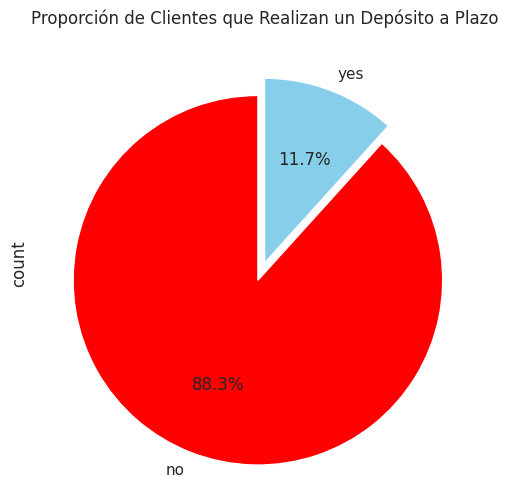

In [203]:
Conteo_de_depósitos = df['Target'].value_counts()
plt.figure(figsize=(6, 6))
Conteo_de_depósitos.plot(kind='pie', colors=['red','skyblue'], explode=(0.1, 0), autopct='%1.1f%%', startangle=90)
plt.title("Proporción de Clientes que Realizan un Depósito a Plazo")
plt.show()

# **Depósitos de plazo por mes**
Es posible visualizar a lo largo del  año en que meses los clientes suscribieron depósitos a plazo y en que cantidad, comparandolos. La idea es buscar patrones para responder a la pregunta "¿El mes de contacto tiene algún tipo de impacto en la respuesta del cliente?". En el cual es claro como en Mayo hay un pico de depósitos comparado con los otros meses.

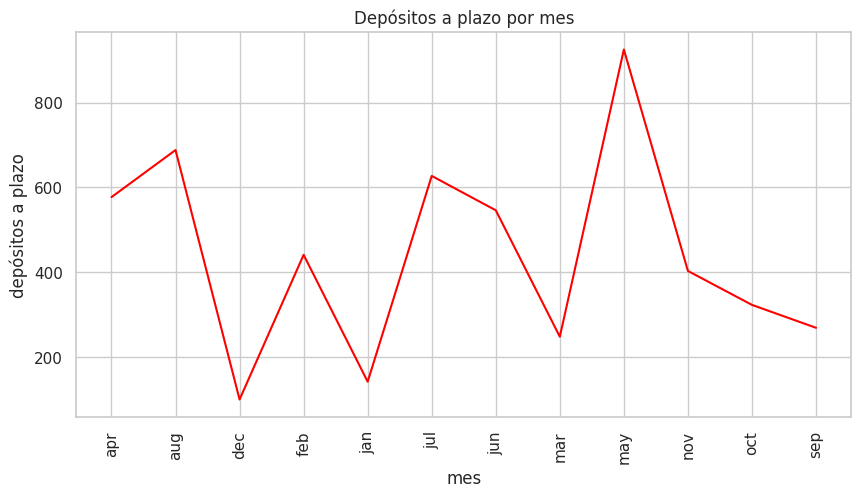

In [64]:
plt.figure(figsize=(10, 5))
df_número_depósito = df[df['Target'] == 'yes'].groupby('month').size().reset_index(name='Count_Target')
sns.lineplot(x='month', y='Count_Target', data=df_número_depósito, color='red')
plt.title("Depósitos a plazo por mes")
plt.xlabel("mes")
plt.ylabel("depósitos a plazo")
plt.xticks(rotation=90)
plt.show()

# **Depósitos a plazo por edad**
A continuación se encuentra información sobre los depósitos que realizan las personas dependiendo de su edad, con el fin de responder a la pregunta "¿La edad influye en la probabilidad de contratar un depósito a plazo o no tiene relación?". En primera instancia se encuentra un gráfico donde se demuestra la cantidad de personas por edad para tener una idea más clara de la distribución. Luego, un gráfico que muestra la cantidad de personas que realizó un depósito a plazo agrupados por rango de edad para una visualización de los datos mas sencilla. Finalmente, es posible concluír que aunque no hay mucha diferencia, las personas entre 26 y 35 años hacen más depósitos a plazo. Igualmente hay que tener en cuenta que en ese rango de edad hay mas personas que en los demás.

In [151]:
df_edad_18_25 = df[(df['age'] >= 18) & (df['age'] <= 25)]
df_edad_26_35 = df[(df['age'] >= 26) & (df['age'] <= 35)]
df_edad_36_45 = df[(df['age'] >= 36) & (df['age'] <= 45)]
df_edad_46_55 = df[(df['age'] >= 46) & (df['age'] <= 55)]
df_edad_56_65 = df[(df['age'] >= 56) & (df['age'] <= 65)]
df_edad_66_75 = df[(df['age'] >= 66) & (df['age'] <= 75)]
df_edad_76_85 = df[(df['age'] >= 76) & (df['age'] <= 85)]
df_edad_86_90 = df[(df['age'] >= 86) & (df['age'] <= 95)]

df_rangos= pd.concat([df_edad_18_25, df_edad_26_35, df_edad_36_45, df_edad_46_55, df_edad_56_65, df_edad_66_75, df_edad_76_85, df_edad_86_95])

# Personas por edad

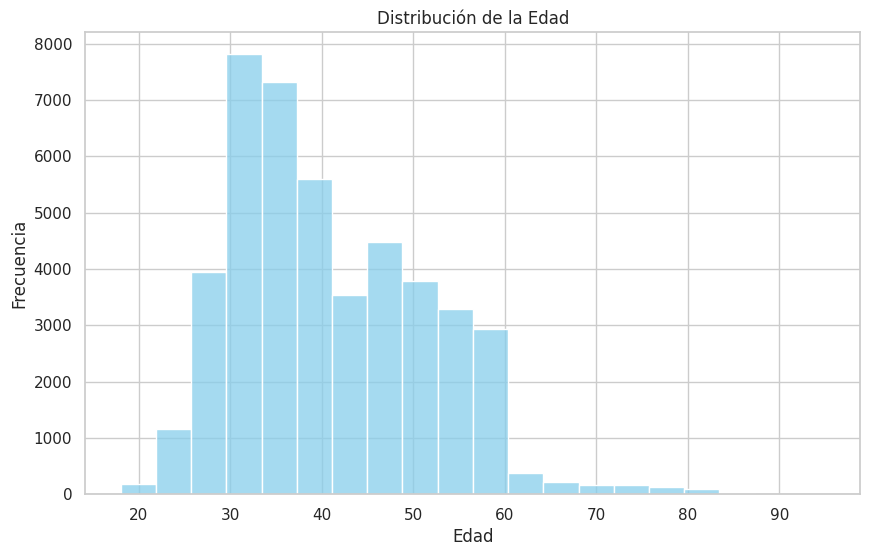

In [152]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=False, bins=20, color='skyblue')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# **Cantidad de depósitos a plazo por rango de edad**

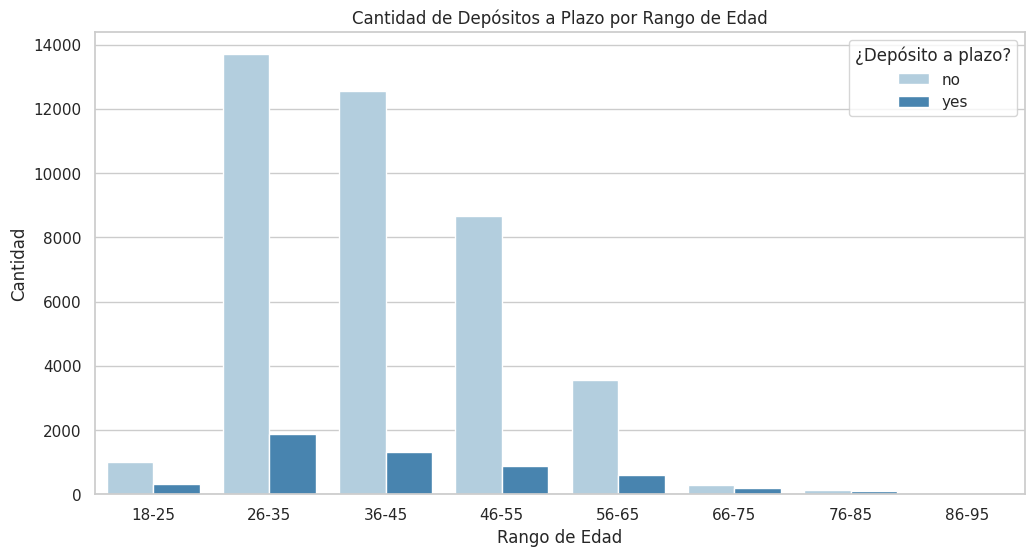

In [209]:
plt.figure(figsize=(12, 6))
df_agrupación = df.groupby(['rango_edad', 'Target']).size().reset_index(name='cantidad')
sns.barplot(x='rango_edad', y='cantidad', hue='Target', data=df_agrupación, palette="Blues")
plt.title('Cantidad de Depósitos a Plazo por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad')
plt.legend(title='¿Depósito a plazo?')
plt.show()

# **Cantidad de depósitos a plazo por edad y tipo de llamada**
El objetivo del siguiente gráfico es ver si el tipo de llamada tiene alguna influencia sobre la cantidad de depósitos a plazo, donde también están separados por rango de edad para buscar patrones. Este análisis está enfocado en la pregunta "¿El tipo de contacto (celular/teléfono fijo) influye en el éxito?". En conclusión, se destaca como las llamadas por celular tienen un mayor éxito en comparación con las que se hacen por teléfono fijo.

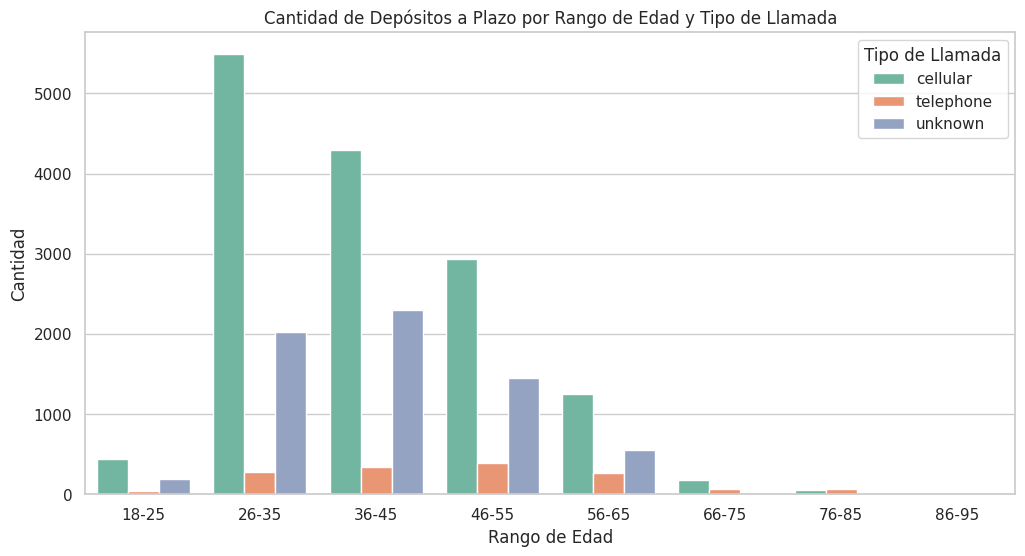

In [208]:
plt.figure(figsize=(12, 6))
df_agrupación = df.groupby(['rango_edad', 'contact', 'Target']).size().reset_index(name='cantidad')
sns.barplot(x='rango_edad', y='cantidad', hue='contact', data=df_agrupación, palette="Set2", ci=None)
plt.title('Cantidad de Depósitos a Plazo por Rango de Edad y Tipo de Llamada')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad')
plt.legend(title='Tipo de Llamada')
plt.show()

# **Depósitos por trabajo**
En el gráfico que se encuentra debajo, tiene el cometido de demostrar que profesiones tienen mayor cantidad de depósitos a plazo y entre que rango se encuentra la cantidad de depósitos. Donde es posible concluír que "blue-collar" tiene un mayor rango de valores y más elevado que los demás, junto con "management", mostrando una diferencia con los demás trabajos.

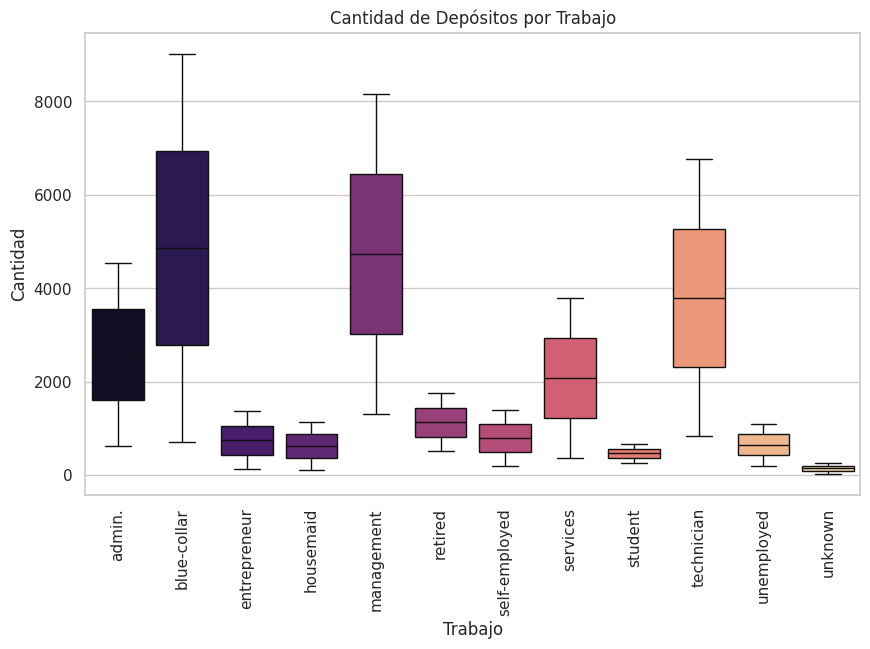

In [207]:
plt.figure(figsize=(10, 6))
df_agrupación = df.groupby(['job', 'Target']).size().reset_index(name='cantidad')
sns.boxplot(data=df_agrupación, x='job', y='cantidad', palette='magma')
plt.title('Cantidad de Depósitos por Trabajo')
plt.xlabel('Trabajo')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show()